## 머신러닝 플로우
    머신러닝 단계는 크게
    데이터 분석 ( 데이터 로더 --> Feature 추출 --> 데이터 전처리 ) --> 모델 생성 --> 모델 학습 --> 예측 --> 평가(Accuracy 측정)
    이렇게 크게 프로세스가 나뉜다
    
    이 중 성능평가단계에서 정확도 측정/ 오차행렬(Confusion Matrix)을 주요하게 살펴보겠다.

### Bagging 기법
    앙상블 알고리즘 중 다양한 영역에서 높은 예측 결과 성능을 보이고 있는 Random Forest이다.
    Random Forest는 Bagging 알고리즘이 적용된 모델이다.
    여러 개의 결정트리가 전체 데이터셋에서 Bagging 방식으로 각자의 데이터셋을 샘플링해 개별적으로 학습을 수행한 뒤에 최종적으로 투표방식을 통해서 가장 보편적인(다수결의 원칙) 예측 결정을 하게 된다.
    
    사이킷런은 RandomForestClassifier 클래스를 통해서 랜덤 포레스트 기반의 분류를 지원한다.

### SKLearn IRIS DataSet Loader

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()
#iris

In [2]:
iris.feature_names
iris.target_names
iris.data
iris.target

iris.data.shape

(150, 4)

In [3]:
## Train, Test DataSet 섞는다. 기본으로 75:25, 시드값 42, 원본 비율과 동일한 라벨이 나오도록 옵션
X_train,X_test, y_train, y_test = train_test_split(iris.data, iris.target,random_state=42,stratify = iris.target)

In [4]:
X_test.shape
X_train.shape

(112, 4)

### RandomForest Model 생성

In [5]:
from sklearn.ensemble import RandomForestClassifier

In [6]:
forest = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
forest

RandomForestClassifier(n_jobs=-1, random_state=42)

### Model 학습

In [7]:
forest.fit(X_train,y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

### Model Accuracy 측정하기
    1) 직접 일일히 확인하기
    2) 사용자 함수 정의해서 확인
    3) score(), accuracy_score() 라이브러리 함수 사용하기

In [8]:
#1) 직접 확인하기
y_pred = forest.predict(X_test)
y_pred

array([0, 1, 1, 1, 0, 1, 1, 2, 2, 2, 1, 2, 1, 1, 0, 0, 0, 1, 0, 1, 2, 1,
       2, 1, 2, 1, 0, 2, 0, 2, 2, 2, 0, 0, 0, 0, 2, 1])

In [9]:
y_test

array([0, 1, 1, 1, 0, 1, 2, 2, 2, 2, 2, 2, 1, 1, 0, 0, 0, 1, 0, 1, 2, 1,
       2, 1, 2, 1, 0, 2, 0, 1, 2, 2, 0, 0, 0, 0, 2, 1])

In [10]:
#2) list(zip())
'''
zip()
2개의 리스트를 병렬적으로 비교할 수 있는 함수
'''
y_tuple = list(zip(y_test,y_pred))
y_tuple

for a,b in y_tuple:
    if not a == b:
        print('unmatched : (y_test, y_pred) =(',a,',',b,')')

unmatched : (y_test, y_pred) =( 2 , 1 )
unmatched : (y_test, y_pred) =( 2 , 1 )
unmatched : (y_test, y_pred) =( 1 , 2 )


In [11]:
from sklearn.metrics import accuracy_score
# 3)
print("Training DataSet 정확도:{:3f}".format(accuracy_score(X_test,y_pred)))
print("Test DataSet 정확도:{:3f}".format(accuracy_score(y_test,y_pred))) # predict()가 진행되지 않는 함수이다.

print("Training DataSet 정확도:{:3f}".format(forest.score(X_train,y_train)))
print("Test DataSet 정확도:{:3f}".format(forest.score(X_test,y_test)))

ValueError: Classification metrics can't handle a mix of continuous-multioutput and multiclass targets

In [15]:
score2 = forest.score(X_test,y_test)
print(score2)

score = accuracy_score(y_test,y_pred)
print(score)

0.9210526315789473
0.9210526315789473


## Confusion Matrix

In [13]:
from sklearn.metrics import confusion_matrix
label = [2,0,2,2,0,1]
predict = [0,0,2,2,0,2]
confusion_matrix(label,predict)

cm = pd.DataFrame(confusion_matrix(label,predict))
cm

,0,1,2
0,2,0,0
1,0,0,1
2,1,0,2


<AxesSubplot:>

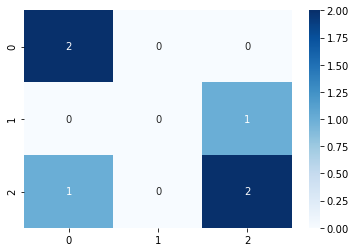

In [14]:
sns.heatmap(cm,annot=True,cmap=plt.cm.Blues)

### 정밀도, 재현율

In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [19]:
precision = precision_score(y_test,y_pred, average="weighted") # 정답, 예측
recall = recall_score(y_test,y_pred, average="weighted")

print("정확도 : {0:.4f},정밀도 : {1:.4f},재현율 : {2:.4f}".format(score, precision, recall))

정확도 : 0.9211,정밀도 : 0.9226,재현율 : 0.9211


In [20]:
aLabel = ["cherry","apple","apple","banana","cherry"] #정답
bPred = ["banana","apple","apple","banana","apple"] #예측값

confusion_matrix(aLabel,bPred)

array([[2, 0, 0],
       [0, 1, 0],
       [1, 1, 0]], dtype=int64)

In [21]:
# 인덱싱 라벨의 순서를 바꾸고 싶다....labels 속성을 사용하면 된다.
aLabel = ["cherry","apple","apple","banana","cherry"] #정답
bPred = ["banana","apple","apple","banana","apple"] #예측값

confusion_matrix(aLabel,bPred, labels=["cherry","apple","banana"])

array([[0, 1, 1],
       [0, 2, 0],
       [0, 0, 1]], dtype=int64)

### 실제 iris 데이터에 적용해보자
    confusion_matrix 함수가 리턴하는 값은 2차원 배열이다.

In [23]:
cm1 = pd.DataFrame(confusion_matrix(y_test,y_pred), index=iris.target_names, columns = iris.target_names)
cm1

,setosa,versicolor,virginica
setosa,12,0,0
versicolor,0,12,1
virginica,0,2,11


### HeatMap Visualization

<AxesSubplot:>

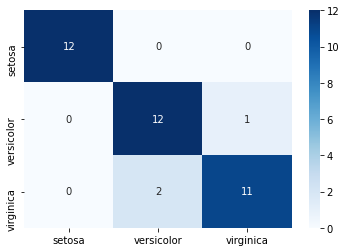

In [26]:
sns.heatmap(cm1,annot=True,cmap=plt.cm.Blues)